<a href="https://colab.research.google.com/github/MitehReddy/ADM-2025-2-2-/blob/main/LAB_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [19]:
np.random.seed(42)
data = np.random.normal(0, 1, 100)
outliers = np.random.uniform(5, 10, 5)
data = np.concatenate([data, outliers])
df = pd.DataFrame(data, columns=["Value"])
df.head()


,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153


In [12]:
df["Z_Score"] = np.abs(stats.zscore(df["Value"]))  # Compute Z-Score
z_outliers = df[df["Z_Score"] > 3]  # Filter outliers
print("Outliers detected using Z-Score:")
print(z_outliers)

Outliers detected using Z-Score:
        Value   Z_Score
100  7.087055  3.836033
101  6.110539  3.289237
102  5.599327  3.002986
103  6.688076  3.612626
104  9.714549  5.307286


In [13]:
Q1 = df["Value"].quantile(0.25)
Q3 = df["Value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["IQR_Outlier"] = (df["Value"] < lower_bound) | (df["Value"] > upper_bound)
iqr_outliers = df[df["IQR_Outlier"]]
print("\nOutliers detected using IQR method:")
print(iqr_outliers)


Outliers detected using IQR method:
        Value   Z_Score  IQR_Outlier
74  -2.619745  1.599248         True
100  7.087055  3.836033         True
101  6.110539  3.289237         True
102  5.599327  3.002986         True
103  6.688076  3.612626         True
104  9.714549  5.307286         True


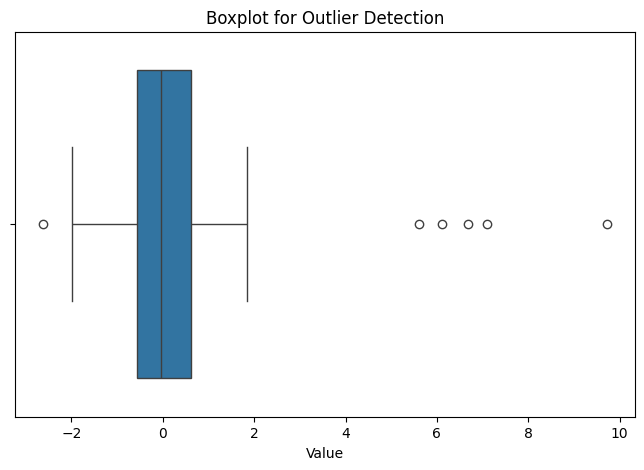

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Value"])
plt.title("Boxplot for Outlier Detection")
plt.show()


In [15]:
df["Capped"] = df["Value"].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [16]:
df_cleaned = df[~df["IQR_Outlier"]]
print("\nData after removing outliers:")
print(df_cleaned.head())


Data after removing outliers:
      Value   Z_Score  IQR_Outlier    Capped
0  0.496714  0.145800        False  0.496714
1 -0.138264  0.209754        False -0.138264
2  0.647689  0.230337        False  0.647689
3  1.523030  0.720481        False  1.523030
4 -0.234153  0.263446        False -0.234153


In [17]:
median_value = df["Value"].median()
df["Imputed"] = df["Value"].apply(lambda x: median_value if (x < lower_bound or x > upper_bound) else x)

In [18]:
print("\nOriginal Data with Outliers:")
print(df.head())

print("\nData after Handling Outliers:")
print(df[["Value", "Capped", "Imputed"]].head())


Original Data with Outliers:
      Value   Z_Score  IQR_Outlier    Capped   Imputed
0  0.496714  0.145800        False  0.496714  0.496714
1 -0.138264  0.209754        False -0.138264 -0.138264
2  0.647689  0.230337        False  0.647689  0.647689
3  1.523030  0.720481        False  1.523030  1.523030
4 -0.234153  0.263446        False -0.234153 -0.234153

Data after Handling Outliers:
      Value    Capped   Imputed
0  0.496714  0.496714  0.496714
1 -0.138264 -0.138264 -0.138264
2  0.647689  0.647689  0.647689
3  1.523030  1.523030  1.523030
4 -0.234153 -0.234153 -0.234153
